# aiReview (this notebook is experimental)

aiReview is an artificial intelligence-based system that creates a reviewer (in the form of an HTML file) from handwritten lecture notes. It uses optical character recognition (OCR) in converting an image of handwritten text into a machine-readable text file. Unlike other OCR software, it also features an annotation-conversion system that converts underlined words in the input with blanks and encircled words into bolded words.

This project is developed by: 

- A.V. Cayetano (THX)
- J. M. Choa (THX)
- H. A. Macalisang (THU)
- R. J. Portuguez (THW)

Thematic inspiration:
SDG 4 – Quality Education.

## Import packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import cv2
from matplotlib import pyplot as plt
import ipynb.fs.defs.utils as utils
from PIL import Image
from IPython.display import display
from scipy.ndimage import interpolation

## Methodology

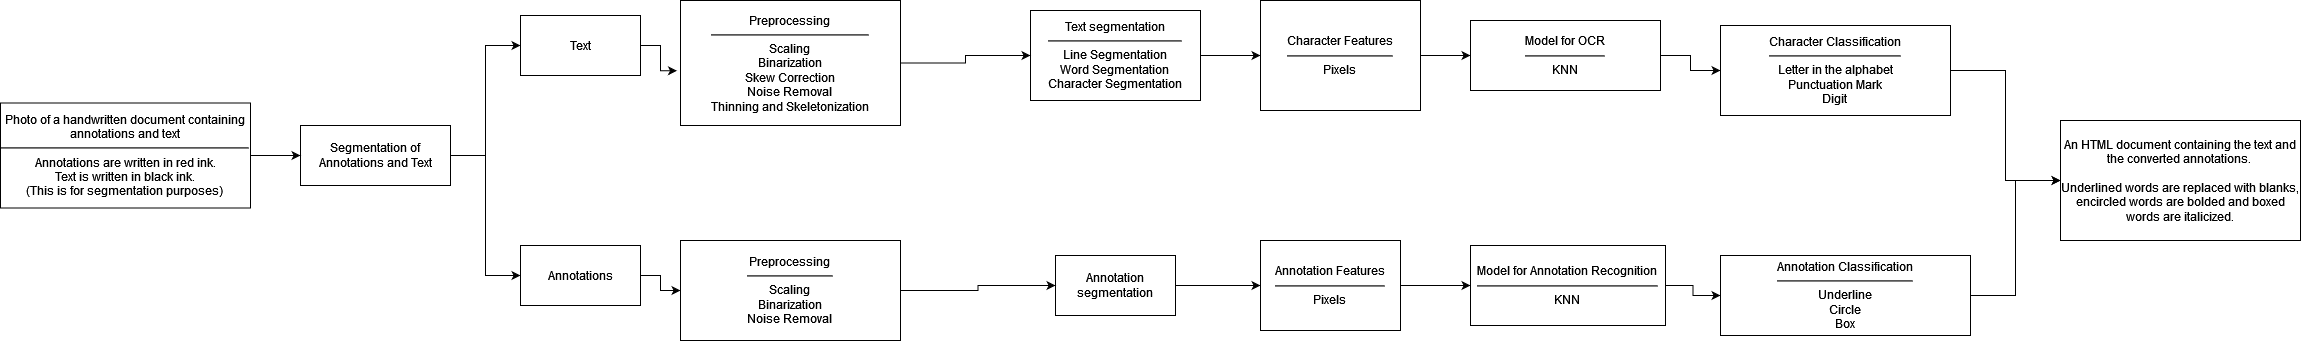

In [4]:
with Image.open("../media/method.png") as method_img:
    display(method_img)
    
# The image below is not updated. Will update soon.
 


## Load Data

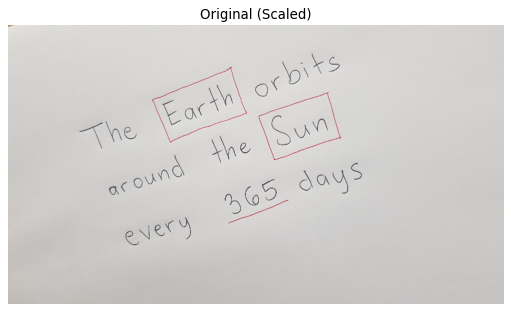

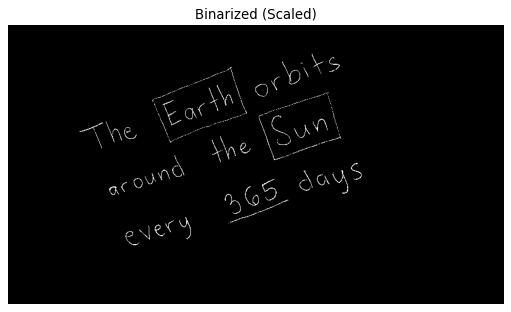

In [10]:
# load training dataset here



# load test data here





IMG_HEIGHT = 500 # all test data will be resized to height=500px; aspect ratio will be maintained

class TestInstance:
    def __init__(self, path):
        self.img = cv2.imread(path)
        
        img_gs = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        
        _, self.img_bin = cv2.threshold(img_gs, 127, 255, cv2.THRESH_BINARY_INV)
        
        utils.plot_img_rgb(img_rgb, "Original (Scaled)")
        utils.plot_img_rgb(cv2.cvtColor(self.img_bin, cv2.COLOR_GRAY2RGB), "Binarized (Scaled)")
        
        
        
def resize(img):
    dim = img.shape[:-1]
    ratio = dim[1] / dim[0]
    target_height = IMG_HEIGHT
    target_width = int(target_height * ratio)
    img = cv2.resize(imgimg, (target_width, target_height))
    
        
test_1 = TestInstance("../input/test_8.png")
resize(test_1.img)

## Segmentation of Annotations and Text and Noise Removal

In [ ]:
# References:
# https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html
# https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
# https://docs.opencv.org/4.x/d5/d69/tutorial_py_non_local_means.html


def get_text(test_img):
    # filter all black inks
    lower_text_color = np.array([0, 0, 0])
    upper_text_color = np.array([179, 44, 130])
    text_img = cv2.inRange(test_img, lower_text_color, upper_text_color)

    return text_img

def remove_noise(img_bin, kernel_size_open=(1, 1), kernel_size_close=(1, 1)):
    kernel_open = np.ones(kernel_size_open, np.uint8)
    kernel_close = np.ones(kernel_size_close, np.uint8)
    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_open)
    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel_close)
    
    img_bin = cv2.fastNlMeansDenoising(img_bin, 10, 17, 31)
    return img_bin


def get_annotations(test_img_bin, text_img_bin):
    # filter all inks that are not text
    annotations_img = cv2.bitwise_xor(test_img_bin, text_img_bin)
    return annotations_img

utils.plot_img_rgb(test_img_rgb, "Original")

text_img_bin = get_text(test_img_hsv)

utils.plot_img_rgb(cv2.cvtColor(text_img_bin, cv2.COLOR_GRAY2RGB), "Text with Noise")

text_img_bin = remove_noise(text_img_bin)


utils.plot_img_rgb(cv2.cvtColor(text_img_bin, cv2.COLOR_GRAY2RGB), "Text Noise Removed")

annotations_img_bin = get_annotations(test_img_bin, text_img_bin)

utils.plot_img_rgb(cv2.cvtColor(annotations_img_bin, cv2.COLOR_GRAY2RGB), "Annotations with Noise")

annotations_img_bin = remove_noise(annotations_img_bin, (1, 1), (2, 2))
# annotations_img_bin = cv2.fastNlMeansDenoising(annotations_img_bin, 3, 11, 25)


utils.plot_img_rgb(cv2.cvtColor(annotations_img_bin, cv2.COLOR_GRAY2RGB), "Annotations Noise Removed")
